<strong><b><font size="5">Previsão de Diabetes utilizando Deep Learning</font></b></strong>

### Definição 

Diabetes é uma doença crônica cada vez mais comum, caracterizada pela incapacidade do corpo de metabolizar a glicose. O objetivo deste estudo foi construir um modelo preditivo eficaz com alta sensibilidade e seletividade para melhor identificar os pacientes em risco de ter Diabetes com base em dados laboratoriais.
Será criado um modelo de aprendizado de máquina para prever diabetes em um dos pacientes utilizando um algoritmo de Deep Learning Keras, que será otimizado com uma pesquisa para encontrar os  hiperparâmetros ideais.
Keras é uma interface de programação de aplicativo (API) de rede neural de alto nível  escrita em Python. Esta biblioteca de rede neural de código aberto foi projetada para fornecer experimentação rápida com redes neurais profundas e pode ser executada em CNTK, TensorFlow e Theano.



In [1]:
#Importação dos Pacotes
import sys
import pandas
import numpy
import sklearn
from tensorflow import keras 

# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Celso Alves" --iversions


Author: Celso Alves

tensorflow_core: 2.0.0
sklearn        : 0.22.1
sys            : 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
pandas         : 1.0.1
numpy          : 1.18.1



### Dataset 

O Dataset pertence ao National Institute of Diabetes and Digestive and Kidney Diseases
Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos.

Definição dos dados:

Pregnancies: Number of times pregnant<br>
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
BloodPressure: Diastolic blood pressure (mm Hg)<br>
SkinThickness: Triceps skin fold thickness (mm)<br>
Insulin: 2-Hour serum insulin (mu U/ml)<br>
BMI: Body mass index (weight in kg/(height in m)^2)<br>
DiabetesPedigreeFunction: Diabetes pedigree function<br>
Age: Age (years)<br>
Outcome: Class variable (0 or 1)<br>

A variável target é Outcome, 0 negativo, 1 positivo.



O Dataset pode ser baixado em "http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"


In [50]:
#nomeando as Colunas
colunas = ['n_pregnant', 'glucose_concentration', 'blood_pressuer (mm Hg)', 'skin_thickness (mm)', 'serum_insulin (mu U/ml)',
        'BMI', 'pedigree_function', 'age', 'class']
#Carregando o dataset num dataframe pandas
df = pd.read_csv('diabetes.csv', names = colunas,sep=',',header=0)

### Analise Exploratória

In [14]:
df.describe()

,n_pregnant,glucose_concentration,blood_pressuer (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Utilização da função corr() do Pandas para calcular uma matriz de correlação. Para calcular a correlação, o coeficiente 
utilizado é o Pearson. O coeficiente de correlação Pearson assume uma distribuição normal dos atributos envolvidos.
Uma correlação de -1  mostra uma correlação totalmente negativa, assim como 1 indica uma correlação positiva, por outro lado, 
um valor de 0 não mostra nenhuma correlação.

In [45]:
correlations = df.corr(method = 'pearson') 
correlations

,n_pregnant,glucose_concentration,blood_pressuer (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
n_pregnant,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
glucose_concentration,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
blood_pressuer (mm Hg),0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
skin_thickness (mm),0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
serum_insulin (mu U/ml),0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
pedigree_function,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
class,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


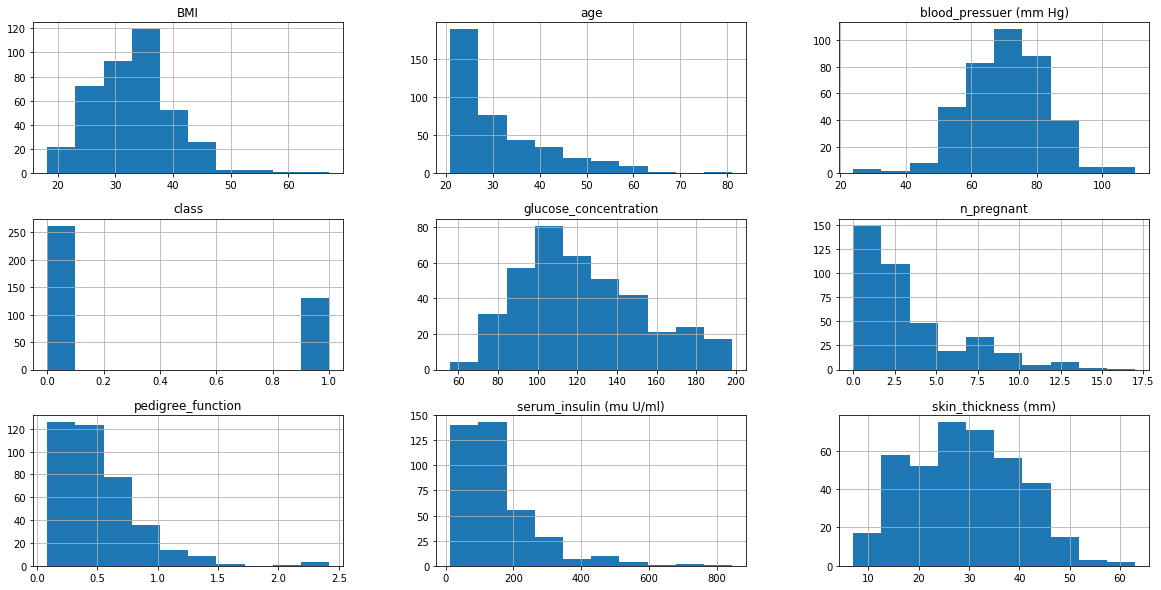

In [47]:
# Carregar matplotlib para visulização
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = [20, 10]
#mostrar histrogramas para cada variavel
df.hist()
pyplot.show()

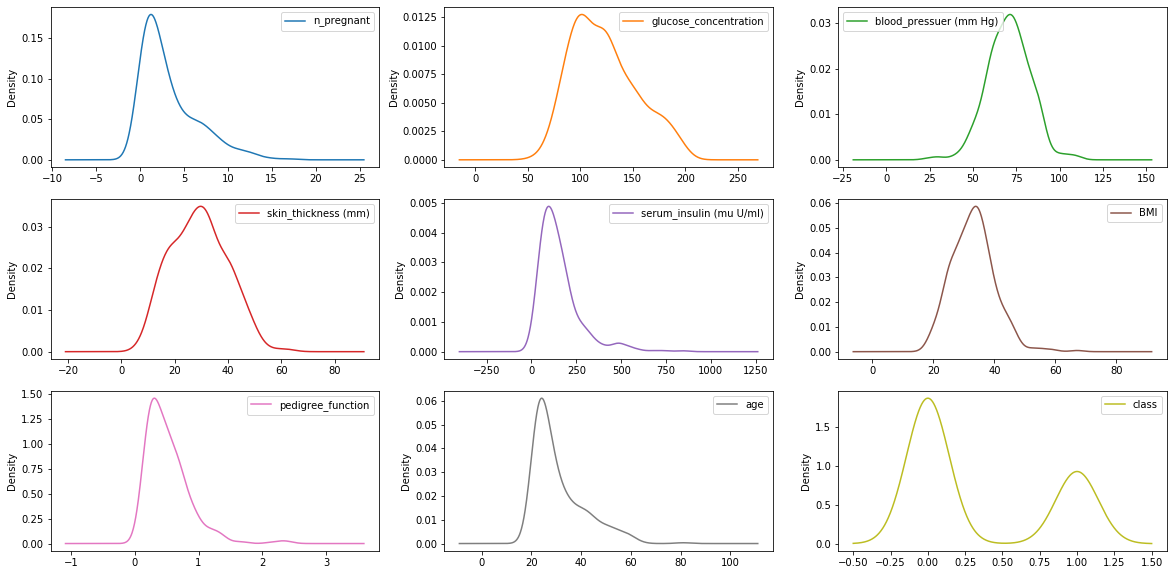

In [48]:
#Plots de Densidade para visulizar a distribuição das variáveis
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

### Pré-Processamento/Data Preparation

In [51]:
#A variavel Glucose é importante verificar pois é necessária para dizer se a pessoa tem diabete
#Filtrando o Dataframe onde o valor é igual a zero.
df[df['glucose_concentration'] == 0]

,n_pregnant,glucose_concentration,blood_pressuer (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Há cinco registros  em que glucose_concentration é 0, o que significa que é provável que haja alguma informação faltando no conjunto de dados. Isso prejudicará a precisão do algoritmo.

In [53]:
# Vamos marcar os valores ausentes como NaN e apaga-los. Primeiro definindo as colunas
colunas = ['glucose_concentration', 'blood_pressuer (mm Hg)', 'skin_thickness (mm)', 'serum_insulin (mu U/ml)', 'BMI']

for col in colunas:
    df[col].replace(0, np.NaN, inplace=True)
    


In [54]:
# Apagar os valores NaN
df.dropna(inplace=True)

# Mostrar os dados do Dataframe depois da alteração
df.describe()

,n_pregnant,glucose_concentration,blood_pressuer (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


O número de ocorrências em soro_insulina caiu para 394, dos 768 iniciais.

In [18]:
# Converter dataframe para numpy array
dataset = df.values
print(dataset.shape)

(392, 9)


In [19]:
# Separar o dataset em dados de treino e teste
X = dataset[:,0:8]
Y = dataset[:, 8].astype(int)


### Normalização do Dataset

Antes de seguir, é necessário normalizar as informações para que o algoritmo possa ler os dados de forma consistente

In [55]:
# Normalizando os dados utilizando StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

In [56]:
print(scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [57]:
# Tranformação dos dados normalizados
X_standardized = scaler.transform(X)

data = pd.DataFrame(X_standardized)
data.describe()

,0,1,2,3,4,5,6,7
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-4.021726e-17,3.129583e-17,-4.641624e-16,1.042250e-16,6.485742e-17,1.543550e-16,3.880116e-17,1.028089e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.029213e+00,-2.161731e+00,-3.739001e+00,-2.108484e+00,-1.196867e+00,-2.120941e+00,-1.269525e+00,-9.682991e-01
25%,-7.174265e-01,-7.665958e-01,-6.941640e-01,-7.755315e-01,-6.681786e-01,-6.676780e-01,-7.340909e-01,-7.719850e-01
50%,-4.056403e-01,-1.176959e-01,-5.314565e-02,-1.384444e-02,-2.574448e-01,1.621036e-02,-2.131475e-01,-3.793569e-01
75%,5.297185e-01,6.609841e-01,5.878727e-01,7.478426e-01,2.859877e-01,5.718696e-01,4.751644e-01,5.040564e-01
max,4.271153e+00,2.445459e+00,3.151946e+00,3.223325e+00,5.812990e+00,4.846172e+00,5.497667e+00,4.921123e+00


### Construindo o modelo

In [63]:
# Importando os pacotes necessários
#GridSearchCV é a função utilizada para realizar o gridsearch, e KFold será usado para realizar o cross-validation.
from sklearn.model_selection import GridSearchCV, KFold

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#Adam é o optimizador que será usado no modelo
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [64]:
# Função para criar o modelo
def create_model(learn_rate, dropout_rate):
    # tipo do modelo
    model = Sequential()
    #camada de input
    #A camada Dropout elimina periodicamente alguns dos neurônios para que os outros tenham que compensar a folga. 
    #Como resultado, evita que qualquer neurônio se torne muito importante para a rede geral ou muito pesado. 
    #Isso ajudará nossa rede neural a generalizar para novos modelos de maneira mais eficaz
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    #Uma camada densa, onde todos os neurônios estão conectados a todas as entradas
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    #A camada de saída, que é a última camada
    model.add(Dense(1, activation='sigmoid'))
    
    # Compilando o modelo
    # Primeiro é definido o otimizador Adam  com a variavel learn_rate
    #isso vai controlar a rapidez com que os parâmetros do modelo sejam atualizados, 
    adam = Adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model
#
model = create_model(0.01,0.0)
print(model.summary())



Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_284 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_285 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_286 (Dense)            (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None


A saída acima temos todas as informações de cada camada. O número total de parâmetros nesta rede neural  é 113, portanto, é uma rede relativamente pequena.

In [65]:
# Definindo a random seed para que os resultados daqui possam ser reproduzidos em outras computadores
seed = 6
np.random.seed(seed)


# Criando o modelo
#Fazeno a chamada a funcação modificando o KerasClassifier com o paratreo entre 100 épocas e 20 de bacth size
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 20, verbose = 0)

#A variável learn_rate controla a velocidade com que atualizamos os parâmetros da rede neural. 
#Se as alterações feitas nos pesos forem muito grandes, o algoritmo pode pular e nunca encontrará os valores minimos e
#perderá acurracia. Por outro lado, se a taxa de aprendizado for muito grande, não atualizaremos os parâmetros com freqüência suficiente 
#para obter um bom critério de parada ou a acuracia desejada. 
#O dropout é uma técnica de regularização para melhorar a capacidade do modelo de generalizar para novos dados.


# Definindo os parametros do gridsearch
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]



# criando um dicionario  com os parametros do gridsearch
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# Construindo e ajustando o GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_standardized, Y)

# contabilizando os resultados
print("Melhor taxa de aprendizado: {0}, usando {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.772, total=  11.2s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.620, total=   3.5s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.6s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.782, total=   3.0s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.5s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.833, total=   3.0s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.5s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.846, total=   3.2s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.7s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.722, total=   3.4s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   27.1s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.696, total=   2.9s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   30.1s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.769, total=   3.1s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   33.1s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.808, total=   3.0s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   36.1s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.808, total=   3.1s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.747, total=   2.9s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.582, total=   2.8s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.769, total=   3.5s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.756, total=   3.0s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.705, total=   2.9s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.734, total=   3.3s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.5min finished


Best: 0.7760142803192138, using {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.7707886934280396 (0.08047532799086493) with: {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.7604673743247986 (0.04513121060322254) with: {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.7119766354560852 (0.06831695421320864) with: {'dropout_rate': 0.0, 'learn_rate': 0.1}
0.7760142803192138 (0.08921201914866246) with: {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.7631937623023987 (0.07688029563793447) with: {'dropout_rate': 0.1, 'learn_rate': 0.01}
0.7401168465614318 (0.059064564318718496) with: {'dropout_rate': 0.1, 'learn_rate': 0.1}
0.7631288409233093 (0.08024263789752752) with: {'dropout_rate': 0.2, 'learn_rate': 0.001}
0.7683219671249389 (0.08656984915695581) with: {'dropout_rate': 0.2, 'learn_rate': 0.01}
0.7196689248085022 (0.06614148179875878) with: {'dropout_rate': 0.2, 'learn_rate': 0.1}


### Otimizando o número de neurônios

Vamos ajustar o número de neurônios em cada uma das  camadas. Será necessário mudar um pouco a função original que cria o modelo

In [73]:
#Definindo a random seed para que os resultados daqui possam ser reproduzidos em outras computadores
seed = 6
np.random.seed(seed)

# Modificando a função original passando como parametros a quantidade de neuronios
def create_model(neuron1, neuron2):
    # create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 8, kernel_initializer= 'uniform', activation= 'linear'))
    #dropout fixado em 0.1
    model.add(Dropout(0.1))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= 'uniform', activation= 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compilando o modelo, a taxa de aprendizado foi fixada em 0.001 porque foi o melhor valor que
    # o algoritimo achou (vide seção acima)
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 20, verbose = 0)

# define the grid search parameters
neuron1 = [8] #[4, 8, 16]
neuron2 = [4] #[2, 4, 8]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), refit = True, verbose = 10)
grid_results = grid.fit(X_standardized, Y)

# summarize the results
print("Melhor: {0}, usando {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] neuron1=8, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=8, neuron2=4, score=0.835, total=   3.2s
[CV] neuron1=8, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] ................ neuron1=8, neuron2=4, score=0.620, total=   3.0s
[CV] neuron1=8, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


[CV] ................ neuron1=8, neuron2=4, score=0.833, total=   2.9s
[CV] neuron1=8, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.0s remaining:    0.0s


[CV] ................ neuron1=8, neuron2=4, score=0.859, total=   3.0s
[CV] neuron1=8, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.0s remaining:    0.0s


[CV] ................ neuron1=8, neuron2=4, score=0.821, total=   2.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.9s finished


Best: 0.7937033295631408, using {'neuron1': 8, 'neuron2': 4}
0.7937033295631408 (0.08760908345665606) with: {'neuron1': 8, 'neuron2': 4}


Na saida anterior, vemos que ter entre 8  e 4 neurônios são os melhores parâmetros

In [74]:
# Gerando as previsões
y_pred = grid.predict(X_standardized)

In [86]:
# para comparação, vou mostrar o primero registro do dataset original
example = df.iloc[1]
print(example)

n_pregnant                   0.000
glucose_concentration      137.000
blood_pressuer (mm Hg)      40.000
skin_thickness (mm)         35.000
serum_insulin (mu U/ml)    168.000
BMI                         43.100
pedigree_function            2.288
age                         33.000
class                        1.000
Name: 4, dtype: float64


A variável "class" com valor de 1 indica que essa pessoa tem diabetes

In [76]:
example = df.iloc[1]
print(example)

n_pregnant                   0.000
glucose_concentration      137.000
blood_pressuer (mm Hg)      40.000
skin_thickness (mm)         35.000
serum_insulin (mu U/ml)    168.000
BMI                         43.100
pedigree_function            2.288
age                         33.000
class                        1.000
Name: 4, dtype: float64


Agora, vou fazer a previsão usando a rede neural utilizando o codigo abaixo:

In [87]:
prediction = grid.predict(X_standardized[1].reshape(1, -1))
print(prediction)

[[1]]


Foi previsto o mesmo valor. :)

Vou gerar um relatório de classificação, ele  é usado para medir a qualidade das previsões de um algoritmo. Quantas previsões são verdadeiras e quantas são falsas. Mais especificamente, verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos são usados.

In [79]:
# Generate a classification report
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

0.7806122448979592
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       262
           1       0.71      0.57      0.63       130

    accuracy                           0.78       392
   macro avg       0.76      0.73      0.74       392
weighted avg       0.77      0.78      0.77       392



O modelo apresentou uma acuracia de 78%, pode ainda melhor se colocar mais variaveis para testar outros parametros de otimização.

### FIM.